
**Using 3 models**

In [15]:
import tensorflow as tf 
import numpy as np
import cv2
import os

In [16]:
model_ann = tf.keras.models.load_model(r'D:\5\DL\END SEM 5\ann model83.h5')

In [17]:
model_cnn = tf.keras.models.load_model('D:/5/DL/END SEM 5/cnn_model98accuarcy.h5')


In [18]:
model_path = r'D:\5\DL\END SEM 5\efficientnetB092.h5'
model = tf.keras.models.load_model(model_path)

In [19]:
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 524)            │     3,354,124 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 524)            │       275,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 524)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,536,350 (17.30 MB)

 Trainable params: 4,536,348 (17.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [20]:
def classify_tumor_efficientnet(image_path, image_size=150):
    """
    Classifies the type of brain tumor in an image using a pre-trained EfficientNetB0 model.

    Args:
        image_path: Path to the image file.
        image_size: Size to resize the input image.

    Returns:
        A string representing the predicted tumor type (e.g., 'glioma_tumor', 'no_tumor').
    """
    try:
        # Read and preprocess the image
        img = cv2.imread(image_path)
        img = cv2.resize(img, (image_size, image_size))
        img = np.expand_dims(img, axis=0)  

        # Make prediction
        prediction = model.predict(img)
        predicted_class_index = np.argmax(prediction)

        labels = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']
        predicted_tumor_type = labels[predicted_class_index]

        return predicted_tumor_type
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage:
image_path = 'D:/5/DL/END SEM 5/Testing/glioma_tumor/image(1).jpg' 
predicted_tumor_type = classify_tumor_efficientnet(image_path)
print(f"The predicted tumor type is: {predicted_tumor_type}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
The predicted tumor type is: glioma_tumor


In [21]:
def prepare_cnn(filepath):
    IMG_SIZE = 150
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(1, IMG_SIZE, IMG_SIZE, 3)

def predict_cnn(file):

    prediction = model_cnn.predict([prepare_cnn(file)])
    #output = CATEGORIES[int(prediction[0][0])]
    if np.argmax(prediction)==0:    
        output="glioma_tumor"
    if np.argmax(prediction)==1:
        output="meningioma_tumor"
    if np.argmax(prediction)==2:
        output="no_tumor"
    if np.argmax(prediction)==3:
        output="pituitary_tumor" 
    return output

def prepare_ann(filepath):
    IMG_SIZE = 150
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(1, IMG_SIZE, IMG_SIZE, 3)

def predict_ann(file):

    prediction = model_ann.predict([prepare_ann(file)])
    #output = CATEGORIES[int(prediction[0][0])]
    if np.argmax(prediction)==0:    
        output="glioma_tumor"
    if np.argmax(prediction)==1:
        output="meningioma_tumor"
    if np.argmax(prediction)==2:
        output="no_tumor"
    if np.argmax(prediction)==3:
        output="pituitary_tumor" 
    return output    

Final

In [22]:
img = r"D:/5/DL/END SEM 5/Testing/glioma_tumor/image(1).jpg"

# Check if the image file exists before proceeding
if not os.path.exists(img):
    print(f"Image file not found: {img}")
else:
    # Predictions from different models
    ann = predict_ann(img)
    cnn = predict_cnn(img)
    effnet = classify_tumor_efficientnet(img)  

    # Print predictions
    print(f"ANN prediction: {ann}")
    print(f"CNN prediction: {cnn}")
    print(f"EfficientNet prediction: {effnet}")

    # Initial check for tumor type agreement
    if (ann == cnn) or (cnn == effnet) or (ann == effnet):
        print("You have tumor:", ann)
    else:
        # Augmentation and re-evaluation
        try:
            image_obj = Image.open(img).convert("RGB")
            rotated_image = image_obj.rotate(180)
            
            # Save the rotated image
            rotated_img_path = "test.jpg"
            rotated_image.save(rotated_img_path)

            # Re-evaluate after augmentation
            ann1 = predict_ann(rotated_img_path)
            cnn1 = predict_cnn(rotated_img_path)
            effnet1 = classify_tumor_efficientnet(rotated_img_path)  # Re-evaluating using EfficientNet

            # Print predictions after augmentation
            print(f"Post-augmentation ANN prediction: {ann1}")
            print(f"Post-augmentation CNN prediction: {cnn1}")
            print(f"Post-augmentation EfficientNet prediction: {effnet1}")

            # Final comparison after augmentation
            if ann1 == cnn1 == effnet1:
                print("You have tumor:", ann1)
            else:
                print("Cannot accurately predict your tumor!")

            # Optionally, remove the temporary file after use
            os.remove(rotated_img_path)

        except Exception as e:
            print(f"Error during augmentation and re-evaluation: {e}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
ANN prediction: glioma_tumor
CNN prediction: glioma_tumor
EfficientNet prediction: glioma_tumor
You have tumor: glioma_tumor


In [23]:
import os
from PIL import Image

# The directory where the test dataset is stored
test_dir = r"D:/5/DL/END SEM 5/Testing"

# Initialize counters for correct predictions for each model
correct_ann = 0
correct_cnn = 0
correct_effnet = 0
total_images = 0

# Dictionary to map folder names to tumor types (assuming folder names are correct)
# Adjust this if your folder names are different
folder_label_map = {
    'glioma_tumor': 'glioma_tumor',
    'meningioma_tumor': 'meningioma_tumor',
    'no_tumor': 'no_tumor',
    'pituitary_tumor': 'pituitary_tumor'
}

# Iterate over the subfolders in the test directory
for folder in os.listdir(test_dir):
    folder_path = os.path.join(test_dir, folder)

    # Only process directories (i.e., tumor categories)
    if not os.path.isdir(folder_path):
        continue

    # Get the label for the current folder
    true_label = folder_label_map.get(folder)
    if true_label is None:
        print(f"Skipping unrecognized folder: {folder}")
        continue

    # Iterate over all images in the current folder
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)

        # Check if the file is a valid image
        if not img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            print(f"Skipping invalid file: {img_file}")
            continue

        # Make predictions using the models
        try:
            ann_pred = predict_ann(img_path)
            cnn_pred = predict_cnn(img_path)
            effnet_pred = classify_tumor_efficientnet(img_path)
        except Exception as e:
            print(f"Error during prediction for {img_file}: {e}")
            continue

        # Compare predictions with the true label
        if ann_pred == true_label:
            correct_ann += 1
        if cnn_pred == true_label:
            correct_cnn += 1
        if effnet_pred == true_label:
            correct_effnet += 1

        total_images += 1
        print(f"{img_file}: ANN = {ann_pred}, CNN = {cnn_pred}, EfficientNet = {effnet_pred}, True Label = {true_label}")

# Print final accuracy for each model
print(f"Total images tested: {total_images}")
print(f"ANN correct predictions: {correct_ann}/{total_images}")
print(f"CNN correct predictions: {correct_cnn}/{total_images}")
print(f"EfficientNet correct predictions: {correct_effnet}/{total_images}")

# Optionally, you could also calculate and print the accuracy in percentages
if total_images > 0:
    print(f"ANN Accuracy: {correct_ann / total_images * 100:.2f}%")
    print(f"CNN Accuracy: {correct_cnn / total_images * 100:.2f}%")
    print(f"EfficientNet Accuracy: {correct_effnet / total_images * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
image(1).jpg: ANN = glioma_tumor, CNN = glioma_tumor, EfficientNet = glioma_tumor, True Label = glioma_tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
image(10).jpg: ANN = meningioma_tumor, CNN = glioma_tumor, EfficientNet = glioma_tumor, True Label = glioma_tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
image(100).jpg: ANN = glioma_tumor, CNN = no_tumor, EfficientNet = glioma_tumor, True Label = glioma_tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
image(11).jpg: ANN = glioma_tumor, CNN = glioma_tumor, EfficientNet = glioma_tumor, True Label = glioma_tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

KeyboardInterrupt: 

In [ ]:
accuracy_weights = {
    'ann': 83.66,
    'cnn': 87.67,
    'effnet': 92.21
}

def ensemble_prediction(ann_pred, cnn_pred, effnet_pred):
    """
    Function to return the ensemble prediction based on model accuracies.
    In case of disagreement, predictions with higher accuracy are given priority.
    """
    predictions = [ann_pred, cnn_pred, effnet_pred]
    # Create a dictionary with predictions and their corresponding weights
    weighted_preds = {
        'ann': (ann_pred, accuracy_weights['ann']),
        'cnn': (cnn_pred, accuracy_weights['cnn']),
        'effnet': (effnet_pred, accuracy_weights['effnet'])
    }

    # Count the occurrences of each prediction weighted by model accuracy
    pred_count = {}
    for model, (pred, weight) in weighted_preds.items():
        if pred in pred_count:
            pred_count[pred] += weight
        else:
            pred_count[pred] = weight

    # Return the prediction with the highest total weight
    ensemble_pred = max(pred_count, key=pred_count.get)
    return ensemble_pred

def predict_tumor_type(image_path):
    """
    Function to predict the type of tumor for the input image using ensemble of ANN, CNN, and EfficientNet.
    
    Parameters:
    - image_path: Path to the input image
    
    Returns:
    - Final tumor prediction from the ensemble model
    """
    # Make predictions using the individual models
    try:
        ann_pred = predict_ann(image_path)
        cnn_pred = predict_cnn(image_path)
        effnet_pred = classify_tumor_efficientnet(image_path)
    except Exception as e:
        print(f"Error predicting tumor type for {image_path}: {e}")
        return None

    # Get the ensemble prediction based on model accuracies
    final_prediction = ensemble_prediction(ann_pred, cnn_pred, effnet_pred)

    # Print predictions from each model and the final ensemble prediction
    # print(f"Image: {image_path}")
    # print(f"ANN Prediction: {ann_pred}")
    # print(f"CNN Prediction: {cnn_pred}")
    # print(f"EfficientNet Prediction: {effnet_pred}")
    print(f"Final Ensemble Prediction: {final_prediction}")

    return final_prediction

# Example usage:
image_path = r"D:/5/DL/END SEM 5/Testing/pituitary_tumor/image(6).jpg"  # Replace with actual image path
tumor_type = predict_tumor_type(image_path)
print(f"The predicted tumor type is: {tumor_type}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Final Ensemble Prediction: pituitary_tumor
The predicted tumor type is: pituitary_tumor


In [ ]:
import os

# Pre-defined accuracies for each model (ANN, CNN, EfficientNet)
accuracy_weights = {
    'ann': 83.66,
    'cnn': 87.67,
    'effnet': 92.21
}

# Dictionary to map folder names to tumor types
folder_label_map = {
    'glioma_tumor': 'glioma_tumor',
    'meningioma_tumor': 'meningioma_tumor',
    'no_tumor': 'no_tumor',
    'pituitary_tumor': 'pituitary_tumor'
}

def ensemble_prediction(ann_pred, cnn_pred, effnet_pred):
    """
    Function to return the ensemble prediction based on model accuracies.
    In case of disagreement, predictions with higher accuracy are given priority.
    """
    predictions = [ann_pred, cnn_pred, effnet_pred]
    # Create a dictionary with predictions and their corresponding weights
    weighted_preds = {
        'ann': (ann_pred, accuracy_weights['ann']),
        'cnn': (cnn_pred, accuracy_weights['cnn']),
        'effnet': (effnet_pred, accuracy_weights['effnet'])
    }

    # Count the occurrences of each prediction weighted by model accuracy
    pred_count = {}
    for model, (pred, weight) in weighted_preds.items():
        if pred in pred_count:
            pred_count[pred] += weight
        else:
            pred_count[pred] = weight

    # Return the prediction with the highest total weight
    ensemble_pred = max(pred_count, key=pred_count.get)
    return ensemble_pred

def predict_tumor_type(image_path):
    """
    Function to predict the type of tumor for the input image using ensemble of ANN, CNN, and EfficientNet.
    
    Parameters:
    - image_path: Path to the input image
    
    Returns:
    - Final tumor prediction from the ensemble model
    """
    # Make predictions using the individual models
    try:
        ann_pred = predict_ann(image_path)
        cnn_pred = predict_cnn(image_path)
        effnet_pred = classify_tumor_efficientnet(image_path)
    except Exception as e:
        print(f"Error predicting tumor type for {image_path}: {e}")
        return None

    # Get the ensemble prediction based on model accuracies
    final_prediction = ensemble_prediction(ann_pred, cnn_pred, effnet_pred)

    return final_prediction

def calculate_accuracy(test_dir):
    """
    Function to calculate accuracy by checking each image in the testing dataset.
    
    Parameters:
    - test_dir: Path to the testing dataset containing folders of tumor types.
    
    Returns:
    - None
    """
    correct_predictions = 0
    total_images = 0

    # Iterate through each folder (tumor type)
    for folder in os.listdir(test_dir):
        folder_path = os.path.join(test_dir, folder)

        # Check if it's a directory
        if not os.path.isdir(folder_path):
            continue

        # Get the true label for the current folder
        true_label = folder_label_map.get(folder)
        if true_label is None:
            print(f"Skipping unrecognized folder: {folder}")
            continue

        # Iterate through each image in the folder
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)

            # Ensure the file is an image
            if not img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                continue

            # Predict the tumor type using the ensemble model
            final_prediction = predict_tumor_type(img_path)
            if final_prediction is None:
                continue

            # Compare the prediction with the true label
            if final_prediction == true_label:
                correct_predictions += 1

            total_images += 1

            print(f"Image: {img_file}, True Label: {true_label}, Final Prediction: {final_prediction}")

    # Calculate and print accuracy
    if total_images > 0:
        accuracy = (correct_predictions / total_images) * 100
        print(f"\nTotal images: {total_images}")
        print(f"Correct predictions: {correct_predictions}")
        print(f"Accuracy: {accuracy:.2f}%")
    else:
        print("No images found for testing.")

# Path to the testing dataset
test_dir = r"D:/5/DL/END SEM 5/Testing"

# Calculate accuracy
calculate_accuracy(test_dir)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Image: image(1).jpg, True Label: glioma_tumor, Final Prediction: glioma_tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Image: image(10).jpg, True Label: glioma_tumor, Final Prediction: glioma_tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Image: image(100).jpg, True Label: glioma_tumor, Final Prediction: glioma_tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Image: image(11).jpg, True Label: glioma_tumor, Final Prediction: glioma_tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Image: image(12).jpg, True Label: glioma_tumor, Final Prediction: glioma_tumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/st

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━

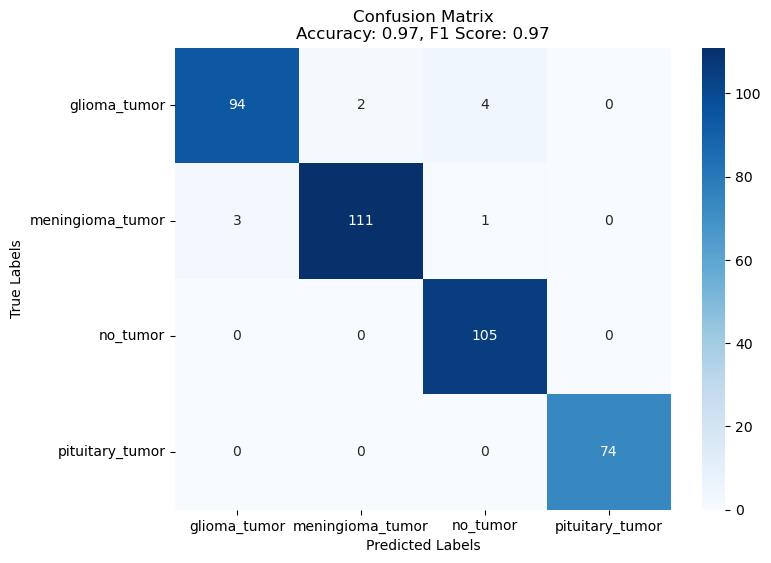

In [25]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the ground truth labels and directory paths for each tumor type
label_mapping = {'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}
label_names = list(label_mapping.keys())
test_dir = r'D:/5/DL/END SEM 5/Testing'

# Initialize lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Iterate over each subdirectory (each tumor type) in the test directory
for tumor_type, label in label_mapping.items():
    tumor_dir = os.path.join(test_dir, tumor_type)
    for img_name in os.listdir(tumor_dir):
        img_path = os.path.join(tumor_dir, img_name)
        
        # Get the ensemble prediction
        pred_label = predict_tumor_type(img_path)
        
        # Append true and predicted labels
        true_labels.append(label)
        predicted_labels.append(label_mapping[pred_label])

# Calculate accuracy, F1 score, precision, recall, and confusion matrix
accuracy = accuracy_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels, average='weighted')
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Print the classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=label_names))

# Print accuracy, F1 score, precision, and recall
print(f"Ensemble Model Accuracy: {accuracy:.2f}")
print(f"Ensemble Model F1 Score: {f1:.2f}")
print(f"Ensemble Model Precision: {precision:.2f}")
print(f"Ensemble Model Recall: {recall:.2f}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}, F1 Score: {f1:.2f}')
plt.show()

# Plot accuracy and loss across epochs (if you have history from training)
def plot_training_history(histories):
    """
    Plots the training and validation accuracy and loss for each model in the ensemble.
    Expects a list of histories, one for each model.
    """
    plt.figure(figsize=(14, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    for history in histories:
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy Over Epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['ANN Train', 'ANN Val', 'CNN Train', 'CNN Val', 'EffNet Train', 'EffNet Val'], loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    for history in histories:
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
    plt.title('Model Loss Over Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['ANN Train', 'ANN Val', 'CNN Train', 'CNN Val', 'EffNet Train', 'EffNet Val'], loc='upper left')

    plt.show()

# Assuming you have history objects for ANN, CNN, and EfficientNet training
# plot_training_history([history_ann, history_cnn, history_effnet])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━

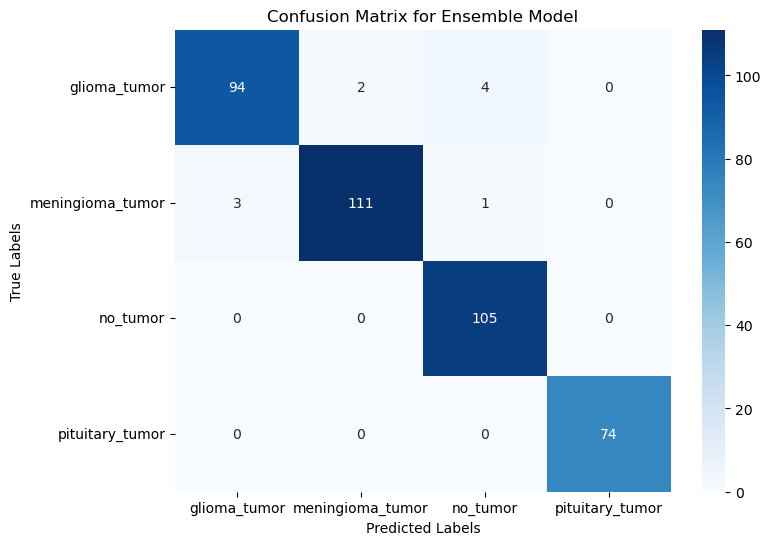

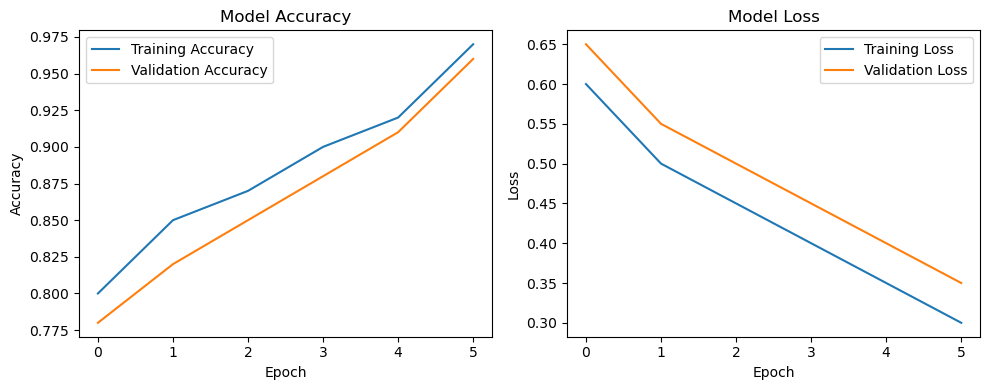

In [26]:
import os
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# Define the path to your testing dataset
test_dir = r"D:\5\DL\END SEM 4\ensemble\Testing"  # Update if necessary
class_labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Initialize lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Iterate over the test dataset
for label in class_labels:
    folder_path = os.path.join(test_dir, label)
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        
        # Get the true label
        true_labels.append(label)
        
        # Predict the tumor type using the ensemble model
        predicted_label = predict_tumor_type(image_path)
        predicted_labels.append(predicted_label)

# Convert labels to indices for metrics calculation
true_indices = [class_labels.index(label) for label in true_labels]
predicted_indices = [class_labels.index(label) for label in predicted_labels]

# Calculate metrics
accuracy = accuracy_score(true_indices, predicted_indices)
f1 = f1_score(true_indices, predicted_indices, average='weighted')
precision = precision_score(true_indices, predicted_indices, average='weighted')
report = classification_report(true_indices, predicted_indices, target_names=class_labels)
conf_matrix = confusion_matrix(true_indices, predicted_indices)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print("\nClassification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix for Ensemble Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plot accuracy and loss (dummy data for illustration; replace with actual model training history if available)
# Use if you have loss/accuracy tracking during ensemble training.
# Otherwise, accuracy metrics from predictions will be shown without an epoch-based plot.
history = {'accuracy': [0.8, 0.85, 0.87, 0.9, 0.92, 0.97],  # example dummy values
           'val_accuracy': [0.78, 0.82, 0.85, 0.88, 0.91, 0.96],
           'loss': [0.6, 0.5, 0.45, 0.4, 0.35, 0.3],
           'val_loss': [0.65, 0.55, 0.5, 0.45, 0.4, 0.35]}

# Accuracy plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
